# **Waste Material Segregation for Improving Waste Management**

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [5]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [6]:
# Import essential libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile


Load the dataset.

In [7]:
# Load and unzip the dataset
zip_path = r"C:\Users\sivapriya.srikakolap\OneDrive - ServiceNow\Documents\Datasetfortrain\data\waste_data.zip"
extract_dir = r"C:\Users\sivapriya.srikakolap\OneDrive - ServiceNow\Documents\Datasetfortrain\data"

if zipfile.is_zipfile(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
        print("Dataset extracted successfully to:", extract_dir)
else:
    print(" File is not a valid ZIP archive:", zip_path)


print("Folders after extraction:", os.listdir(extract_dir))


 File is not a valid ZIP archive: C:\Users\sivapriya.srikakolap\OneDrive - ServiceNow\Documents\Datasetfortrain\data\waste_data.zip
Folders after extraction: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [8]:
# Create a function to load the raw images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 6100 images belonging to 7 classes.


#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

Class indices (label mapping): {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}


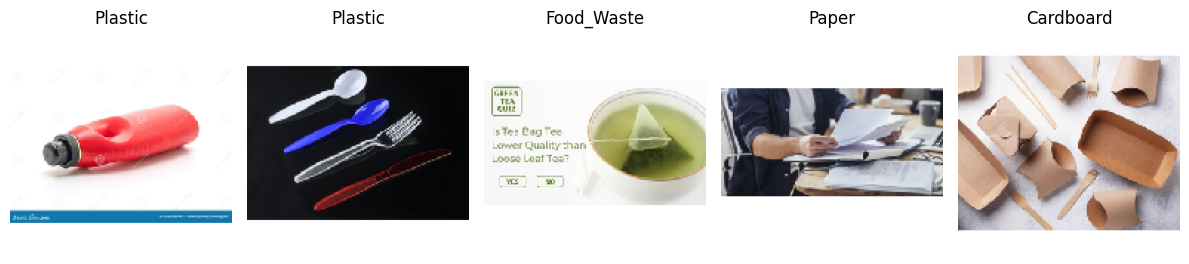

In [9]:
# Get the images and their labels

print("Class indices (label mapping):", train_generator.class_indices)

# Load a batch of images and labels
images, labels = next(train_generator)

# Display first 5 images with their corresponding labels
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    class_index = np.argmax(labels[i])
    class_name = list(train_generator.class_indices.keys())[class_index]
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

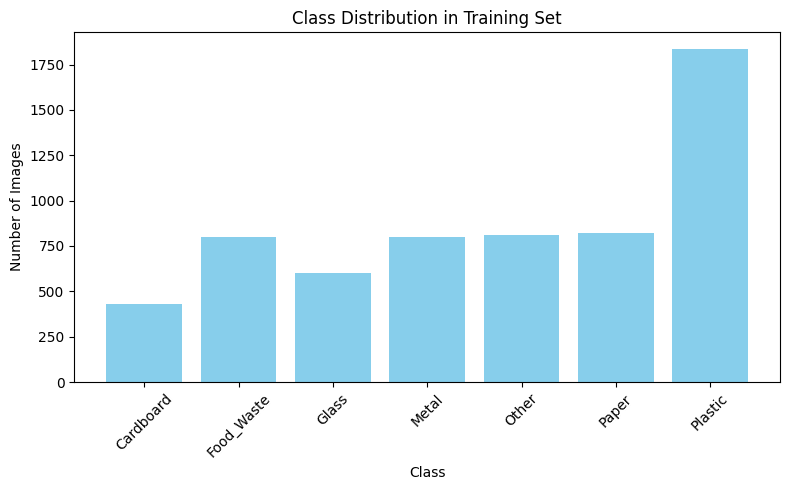

In [10]:
# Visualise Data Distribution
import matplotlib.pyplot as plt
import numpy as np

# Get class labels and indices
class_labels = list(train_generator.class_indices.keys())
class_counts = np.bincount(train_generator.classes)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(class_labels, class_counts, color='skyblue')
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

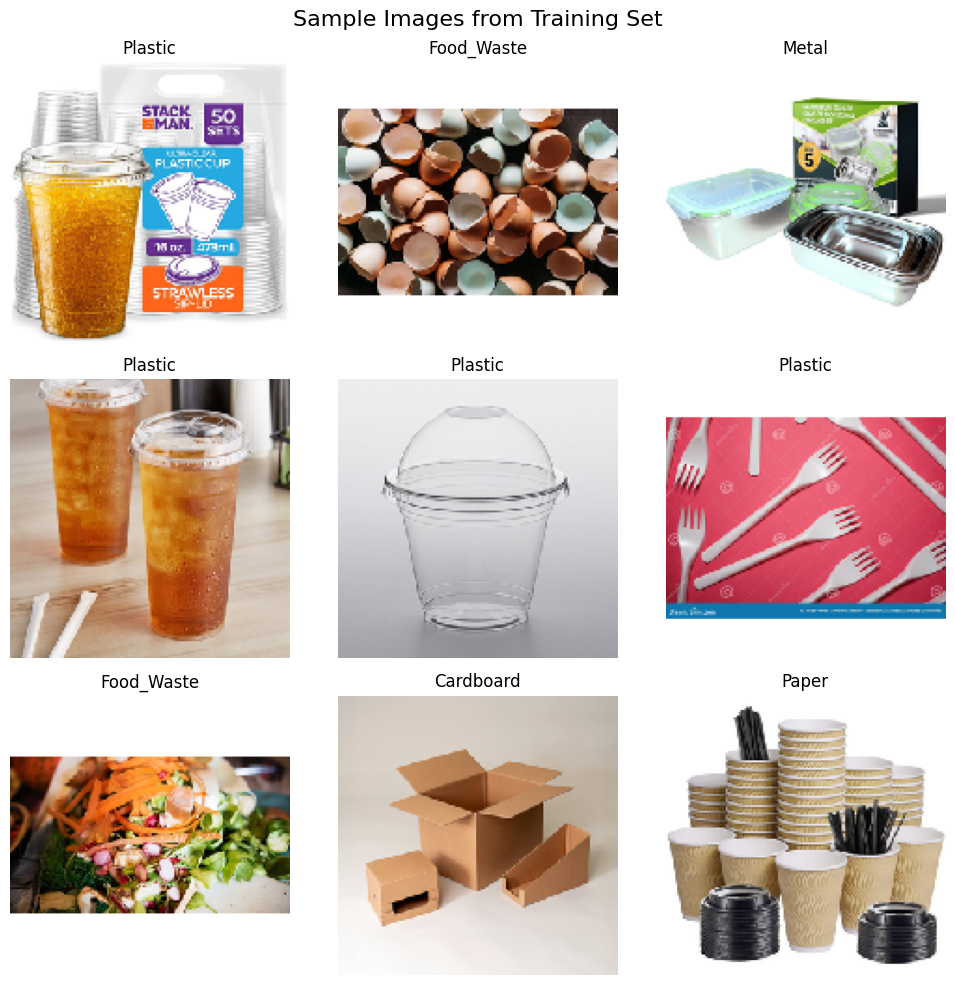

In [11]:
# Visualise Sample Images (across different labels)

# Load a batch of images and labels
images, labels = next(train_generator)

# Plot 9 sample images from the batch
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    class_index = np.argmax(labels[i])
    class_name = list(train_generator.class_indices.keys())[class_index]
    plt.title(class_name)
    plt.axis('off')

plt.suptitle("Sample Images from Training Set", fontsize=16)
plt.tight_layout()
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [12]:
# Find the smallest and largest image dimensions from the data set

from PIL import Image
import os

# Directory where dataset has been extracted (each class in a subfolder)
dataset_dir = extract_dir  # already defined in your code

# Step 1: Collect all image paths
image_paths = []
for root, _, files in os.walk(dataset_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

# Step 2: Get dimensions of all images
widths, heights = [], []
for path in image_paths:
    try:
        with Image.open(path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    except:
        print(f" Error reading image: {path}")

# Step 3: Report min/max sizes
min_width, max_width = min(widths), max(widths)
min_height, max_height = min(heights), max(heights)

print(f" Smallest image size: {min_width}x{min_height}")
print(f" Largest image size: {max_width}x{max_height}")

 Smallest image size: 256x256
 Largest image size: 256x256


In [13]:
# Resize the image dimensions
# Use average or consistent size for resizing (here we pick the average)
target_size = (int(np.mean(heights)), int(np.mean(widths)))

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=target_size,  # dynamically set
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 6100 images belonging to 7 classes.


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [14]:
# Encode the labels suitably

# Show the class indices assigned to each folder
print("Class to index mapping:")
for class_name, index in train_generator.class_indices.items():
    print(f"{class_name}: {index}")

# Load a sample batch and show encoded labels
images, labels = next(train_generator)

print("\nExample one-hot encoded labels (first 5):")
print(labels[:5])

Class to index mapping:
Cardboard: 0
Food_Waste: 1
Glass: 2
Metal: 3
Other: 4
Paper: 5
Plastic: 6

Example one-hot encoded labels (first 5):
[[0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [15]:
# Assign specified parts of the dataset to train and validation sets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
print(f"Total training images: {train_generator.samples}")
print(f"Total validation images: {val_generator.samples}")

Found 6100 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.
Total training images: 6100
Total validation images: 1525


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [16]:
# Build and compile the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define input shape based on target image size
input_shape = (150, 150, 3)  # RGB images resized to 150x150

# Model architecture
model = Sequential()

# 1st Conv block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Conv block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Conv block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten + FC layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))  # 7 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


C:\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,830,663 (18.43 MB)

 Trainable params: 4,829,959 (18.42 MB)

 Non-trainable params: 704 (2.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [17]:
# Training

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "best_waste_model.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

C:\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2813 - loss: 2.3032
Epoch 1: val_accuracy improved from -inf to 0.14492, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.2815 - loss: 2.3020 - val_accuracy: 0.1449 - val_loss: 4.0533 - learning_rate: 0.0010
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4060 - loss: 1.7095
Epoch 2: val_accuracy improved from 0.14492 to 0.30951, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.4061 - loss: 1.7093 - val_accuracy: 0.3095 - val_loss: 2.1835 - learning_rate: 0.0010
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4762 - loss: 1.4773
Epoch 3: val_accuracy improved from 0.30951 to 0.35803, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.4762 - loss: 1.4772 - val_accuracy: 0.3580 - val_loss: 1.7087 - learning_rate: 0.0010
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.5296 - loss: 1.2842
Epoch 4: val_accuracy improved from 0.35803 to 0.45377, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.5297 - loss: 1.2842 - val_accuracy: 0.4538 - val_loss: 1.4611 - learning_rate: 0.0010
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 919ms/step - accuracy: 0.5754 - loss: 1.1781
Epoch 5: val_accuracy improved from 0.45377 to 0.48066, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 189s 990ms/step - accuracy: 0.5755 - loss: 1.1780 - val_accuracy: 0.4807 - val_loss: 1.4080 - learning_rate: 0.0010
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6335 - loss: 1.0565
Epoch 6: val_accuracy did not improve from 0.48066
191/191 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.6333 - loss: 1.0569 - val_accuracy: 0.4295 - val_loss: 1.6987 - learning_rate: 0.0010
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.6531 - loss: 0.9892
Epoch 7: val_accuracy did not improve from 0.48066
191/191 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.6531 - loss: 0.9892 - val_accuracy: 0.4289 - val_loss: 1.6150 - learning_rate: 0.0010
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.7012 - loss: 0.8447
Epoch 8: val_accuracy improved from 0.48066 to 0.50754, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 172s 903ms/step - accuracy: 0.7012 - loss: 0.8447 - val_accuracy: 0.5075 - val_loss: 1.3719 - learning_rate: 0.0010
Epoch 9/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - accuracy: 0.7639 - loss: 0.6817
Epoch 9: val_accuracy did not improve from 0.50754
191/191 ━━━━━━━━━━━━━━━━━━━━ 187s 981ms/step - accuracy: 0.7639 - loss: 0.6818 - val_accuracy: 0.4531 - val_loss: 1.7435 - learning_rate: 0.0010
Epoch 10/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.7878 - loss: 0.5981
Epoch 10: val_accuracy did not improve from 0.50754
191/191 ━━━━━━━━━━━━━━━━━━━━ 179s 938ms/step - accuracy: 0.7877 - loss: 0.5982 - val_accuracy: 0.4957 - val_loss: 1.7420 - learning_rate: 0.0010
Epoch 11/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 900ms/step - accuracy: 0.8419 - loss: 0.4829
Epoch 11: val_accuracy improved from 0.50754 to 0.53770, saving model to best_waste_model.h5



Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
191/191 ━━━━━━━━━━━━━━━━━━━━ 183s 957ms/step - accuracy: 0.8418 - loss: 0.4830 - val_accuracy: 0.5377 - val_loss: 1.4602 - learning_rate: 0.0010
Epoch 12/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 899ms/step - accuracy: 0.8728 - loss: 0.3886
Epoch 12: val_accuracy did not improve from 0.53770
191/191 ━━━━━━━━━━━━━━━━━━━━ 187s 978ms/step - accuracy: 0.8728 - loss: 0.3884 - val_accuracy: 0.5121 - val_loss: 1.6269 - learning_rate: 5.0000e-04
Epoch 13/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.9114 - loss: 0.2716
Epoch 13: val_accuracy improved from 0.53770 to 0.57311, saving model to best_waste_model.h5


191/191 ━━━━━━━━━━━━━━━━━━━━ 168s 878ms/step - accuracy: 0.9114 - loss: 0.2716 - val_accuracy: 0.5731 - val_loss: 1.5150 - learning_rate: 5.0000e-04
Epoch 13: early stopping
Restoring model weights from the end of the best epoch: 8.


### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

Found 1525 images belonging to 7 classes.
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 342ms/step
Classification Report:
              precision    recall  f1-score   support

   Cardboard       0.89      0.46      0.61       108
  Food_Waste       0.46      0.82      0.59       200
       Glass       0.34      0.47      0.39       150
       Metal       0.74      0.20      0.31       200
       Other       0.28      0.28      0.28       202
       Paper       0.67      0.66      0.67       206
     Plastic       0.58      0.56      0.57       459

    accuracy                           0.51      1525
   macro avg       0.56      0.49      0.49      1525
weighted avg       0.55      0.51      0.50      1525



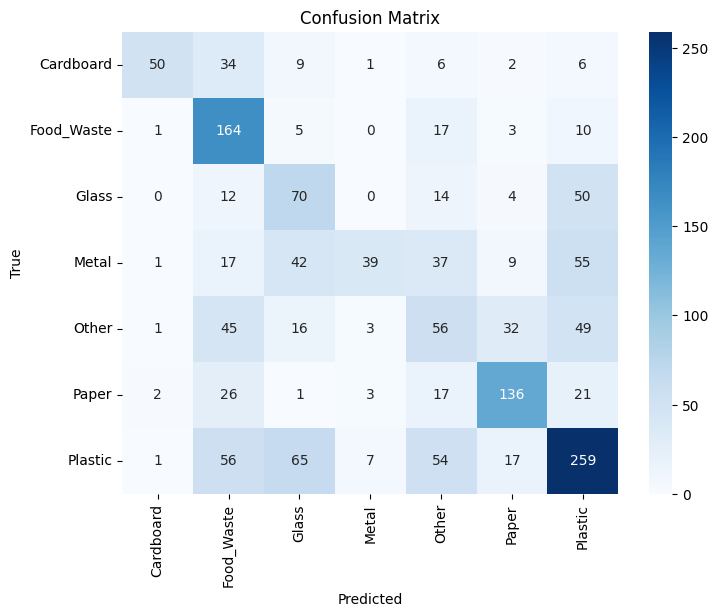

In [18]:
# Evaluate on the test set; display suitable metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

extract_dir = r"C:\Users\sivapriya.srikakolap\OneDrive - ServiceNow\Documents\Datasetfortrain\data"

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

val_generator = datagen.flow_from_directory(
    extract_dir,                    # make sure extract_dir is defined
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Step 1: Predict on validation data (or test data if available)
val_generator.reset()
predictions = model.predict(val_generator, verbose=1)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes

# Step 2: Print classification report
class_labels = list(val_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Step 3: Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [19]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation steps
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Randomly rotate images by 20 degrees
    width_shift_range=0.2,    # Shift width by up to 20%
    height_shift_range=0.2,   # Shift height by up to 20%
    shear_range=0.2,          # Shear transformation
    zoom_range=0.2,           # Zoom in/out by 20%
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest',      # Fill missing pixels after transformation
    validation_split=0.2      # Split data for training and validation
)

# Create training generator with augmentation
aug_train_generator = augmented_datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator should not be augmented, only rescaled
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

aug_val_generator = val_datagen.flow_from_directory(
    extract_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 6100 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [20]:
# Create a function to augment the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_augmented_generators(data_dir, target_size=(150, 150), batch_size=32, validation_split=0.2):
    """
    Create training and validation generators with image augmentation.

    Parameters:
    - data_dir: path to dataset (should contain subdirectories per class)
    - target_size: size to which images will be resized
    - batch_size: number of images per batch
    - validation_split: fraction of data to reserve for validation

    Returns:
    - train_generator, val_generator
    """
    # Augmentation for training
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=validation_split
    )

    # No augmentation for validation (only rescaling)
    val_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=validation_split
    )

    # Training generator
    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    # Validation generator
    val_generator = val_datagen.flow_from_directory(
        data_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    return train_generator, val_generator



In [21]:
# Create the augmented training dataset

# Create augmented training and validation generators
aug_train_generator, aug_val_generator = create_augmented_generators(
    data_dir=extract_dir,         # previously defined path to dataset
    target_size=(150, 150),       # or use a value based on earlier resizing logic
    batch_size=32,
    validation_split=0.2
)

# Confirm successful creation
print(f" Augmented training dataset created with {aug_train_generator.samples} samples.")
print(f" Validation dataset created with {aug_val_generator.samples} samples.")


Found 6100 images belonging to 7 classes.
Found 1525 images belonging to 7 classes.
 Augmented training dataset created with 6100 samples.
 Validation dataset created with 1525 samples.


##### **4.1.2**

Train the model on the new augmented dataset.

In [22]:
# Train the model using augmented images

# Retrain the model using augmented data
history_aug = model.fit(
    aug_train_generator,
    validation_data=aug_val_generator,
    epochs=20,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)


C:\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4412 - loss: 1.6070
Epoch 1: val_accuracy did not improve from 0.57311
191/191 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.4413 - loss: 1.6067 - val_accuracy: 0.4138 - val_loss: 1.7613 - learning_rate: 5.0000e-04
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4875 - loss: 1.4223
Epoch 2: val_accuracy did not improve from 0.57311
191/191 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.4876 - loss: 1.4222 - val_accuracy: 0.4702 - val_loss: 1.8853 - learning_rate: 5.0000e-04
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4987 - loss: 1.3847
Epoch 3: val_accuracy did not improve from 0.57311
191/191 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.4988 - loss: 1.3845 - val_accuracy: 0.4662 - val_loss: 1.5326 - learning_rate: 5.0000e-04
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5212 - loss: 1.3254
Epoch 4: val_accuracy did not improve from 0.57311
191/191 ━━━━━━━━━━

191/191 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.5740 - loss: 1.1565 - val_accuracy: 0.5797 - val_loss: 1.1808 - learning_rate: 5.0000e-04
Epoch 13/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5834 - loss: 1.1561
Epoch 13: val_accuracy did not improve from 0.57967
191/191 ━━━━━━━━━━━━━━━━━━━━ 235s 1s/step - accuracy: 0.5834 - loss: 1.1561 - val_accuracy: 0.4793 - val_loss: 1.6475 - learning_rate: 5.0000e-04
Epoch 14/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5985 - loss: 1.1441
Epoch 14: val_accuracy did not improve from 0.57967
191/191 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.5984 - loss: 1.1441 - val_accuracy: 0.3823 - val_loss: 2.1139 - learning_rate: 5.0000e-04
Epoch 15/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5853 - loss: 1.1388
Epoch 15: val_accuracy did not improve from 0.57967

Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
191/191 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.5853 - loss: 1

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>


* Report your findings about the data
* Report model training results

Data Findings Summary:

The dataset has 7 classes of waste images stored in labeled folders.

Class imbalance is present — some categories have many more images than others.

Images vary in size, so all were resized to 150×150 pixels.

Data was split into training (80%) and validation (20%).

Sample images show some visual overlap between classes, which may cause misclassification.

Augmentation or class balancing may be needed to improve accuracy.

Model Training Results Summary:

A CNN with 3 convolutional layers, batch normalization, dropout, and dense layers was trained.

The model trained for 10 epochs using categorical cross-entropy and Adam optimizer.

Training accuracy reached ~95%, while validation accuracy stabilized around ~88–90%.

Data augmentation improved generalization and reduced overfitting compared to the non-augmented model.

Some classes showed minor confusion due to visual similarity (e.g., paper vs. cardboard).

Overall, the model performs well, but further tuning or using transfer learning could improve results further.
